## Question: What is the entropy content of different texts?

Let's assume that the discrete probability distribution of words is exactly defined by a text sample. This is untrue, of course, since for any given text sample, there are words (plenty of them) unrepresented in the sample. Also, we're not going to create a placeholder for an "unknown" token. Given this idealized finite distribution, what is the entropy content of a corpus? And how does this figure vary with sample size? Does this idealization closely approximate the ~10-12 bits/word cited in the literature, calculated by other means? Lastly, what can the bitrate ~ sample size curve tell us about the type-token relation?

In [8]:
# bloody dependencies
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 16,8
import numpy as np
import pandas as pd

# custom classes
from legomena import Corpus

### Choosing a Book

Let's pick three books, which I hypothesize to be as follows:

- low-entropy: The King James Bible. No offense to the religious intended. Sacred texts, chants, and epic poems tend to be very structurally repetitive.
- normal-entropy: Moby Dick. I'm assuming that a random book of decent length will give us a good notion of what normal entropy means.
- high-entropy: Ulysses. Offense intended. This _terrible_ book is more of a linguistic experiment than an actual work of fiction.

In [2]:
def spgc_read(fileid):

    # open file
    fname = "../data/SPGC-counts-2018-07-18/%s" % fileid
    with open(fname) as f:
        df = pd.read_csv(f, delimiter="\t", header=None, names=["word", "freq"])
        f.close()

    # load as dictionary
    wfd = {str(row.word): int(row.freq) for row in df.itertuples()}
    return wfd

# bible
bible = spgc_read("PG10_counts.txt")
bible = Corpus(bible)

# moby dick
mobydick = spgc_read("PG2701_counts.txt")
mobydick = Corpus(mobydick)

# ulysses
ulysses = spgc_read("PG4300_counts.txt")
ulysses = Corpus(ulysses)

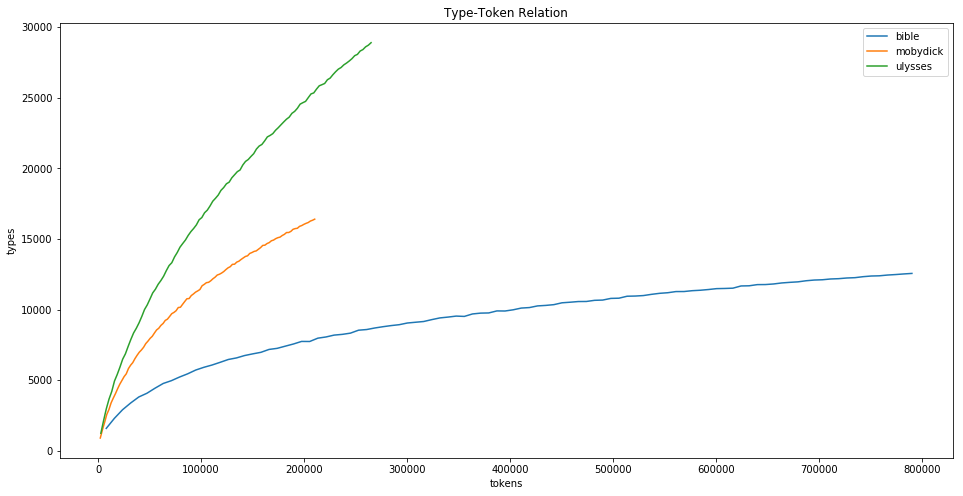

In [9]:
# TTR curves
TTR_bible = bible.TTR
TTR_mobydick = mobydick.TTR
TTR_ulysses = ulysses.TTR

# plot them
plt.plot(TTR_bible.m_tokens, TTR_bible.n_types, label="bible")
plt.plot(TTR_mobydick.m_tokens, TTR_mobydick.n_types, label="mobydick")
plt.plot(TTR_ulysses.m_tokens, TTR_ulysses.n_types, label="ulysses")
plt.title("Type-Token Relation")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()

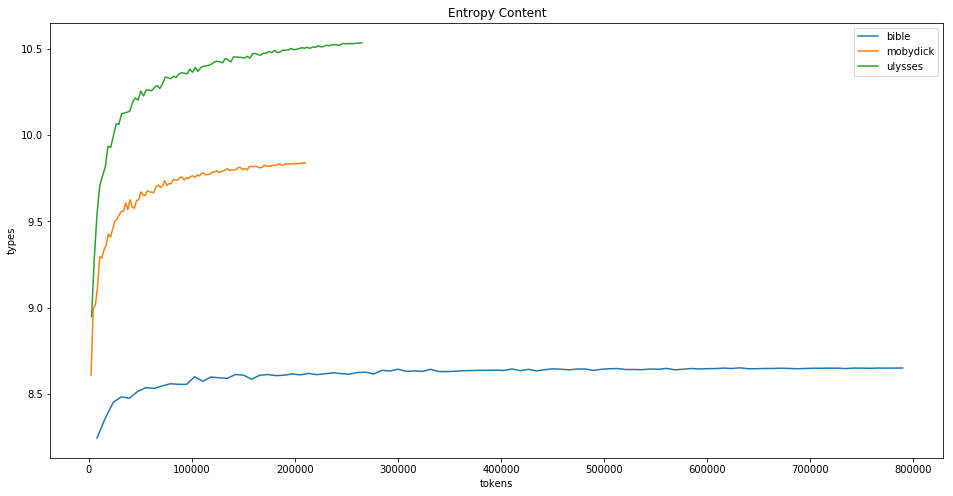

In [10]:
# entropy
bits_bible = [ bible.sample(m=m).bits for m in TTR_bible.m_tokens ]
bits_mobydick = [ mobydick.sample(m=m).bits for m in TTR_mobydick.m_tokens ]
bits_ulysses = [ ulysses.sample(m=m).bits for m in TTR_ulysses.m_tokens ]

# plot them
plt.plot(TTR_bible.m_tokens, bits_bible, label="bible")
plt.plot(TTR_mobydick.m_tokens, bits_mobydick, label="mobydick")
plt.plot(TTR_ulysses.m_tokens, bits_ulysses, label="ulysses")
plt.title("Entropy Content")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()